# **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq, fft, fftfreq

# **Working with Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Shamim/100.csv')
COLUMNS = ['Time', 'V5']

data = data.iloc[1:]
data = data.drop(["'MLII'"], axis=1)
data.columns = COLUMNS
data

,Time,V5
1,'0:00.000',-0.065
2,'0:00.003',-0.065
3,'0:00.006',-0.065
4,'0:00.008',-0.065
5,'0:00.011',-0.065
...,...,...
3596,'0:09.986',-0.285
3597,'0:09.989',-0.285
3598,'0:09.992',-0.295
3599,'0:09.994',-0.290


In [ ]:
data.V5 = data.V5.apply(float)

# **Signal Processing**

### **Create Noise**

In [ ]:
x = np.linspace(0, 10, 3600, endpoint=False)
y = 0.2*np.sin((2*np.pi)* x*50)

In [ ]:
len(y)

3600

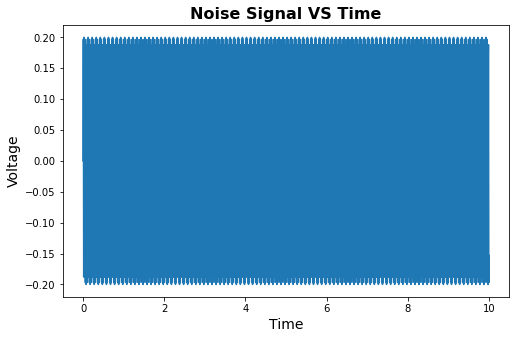

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x, y)
# plt.xlim(0, 10)
plt.title("Noise Signal VS Time", fontdict={"size":16, 'weight': 'bold'})
plt.xlabel('Time', fontdict={"size":14})
plt.ylabel('Voltage', fontdict={"size":14})
plt.show()
plt.show()

### **Create Noisy ECG Signal**

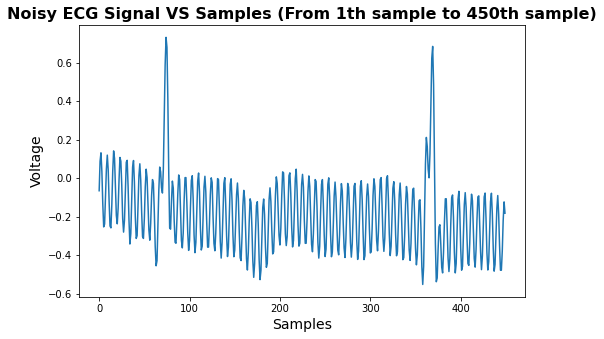

In [ ]:
ecg = np.array(data.V5.to_list())

noisy_ecg = y + ecg # sum

plt.figure(figsize=(8, 5))
plt.plot(noisy_ecg[:450])
plt.title("Noisy ECG Signal VS Samples (From 1th sample to 450th sample)", fontdict={"size":16, 'weight': 'bold'})
plt.xlabel('Samples', fontdict={"size":14})
plt.ylabel('Voltage', fontdict={"size":14})
plt.show()


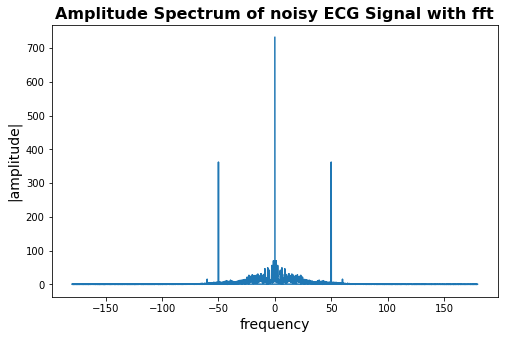

In [ ]:
yf = fft(noisy_ecg)
xf = fftfreq(n=3600, d=1/360)

plt.figure(figsize=(8, 5))
plt.plot(xf, np.abs(yf))
plt.title("Amplitude Spectrum of noisy ECG Signal with fft", fontdict={"size":16, 'weight': 'bold'})
plt.xlabel('frequency', fontdict={"size":14})
plt.ylabel('|amplitude|', fontdict={"size":14})
plt.show()

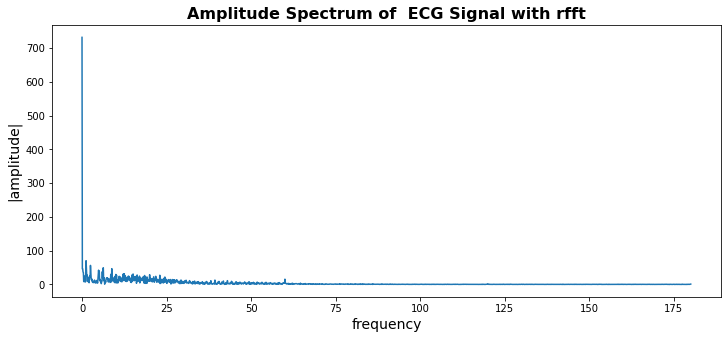

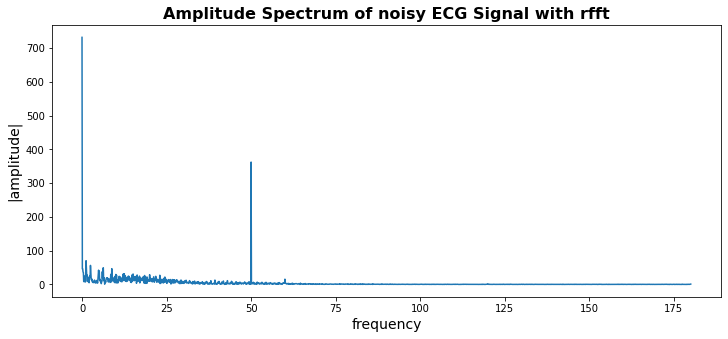

In [ ]:

ecg_rf = np.abs(rfft(ecg))
xf2 = rfftfreq(n=3600, d=1/360)

plt.figure(figsize=(12, 5))
plt.plot(xf2, ecg_rf)
# plt.xlim(-10, 100)
plt.title("Amplitude Spectrum of  ECG Signal with rfft", fontdict={"size":16, 'weight': 'bold'})
plt.xlabel('frequency', fontdict={"size":14})
plt.ylabel('|amplitude|', fontdict={"size":14})
plt.show()


noisy_ecg_rf = np.abs(rfft(noisy_ecg))
xf1 = rfftfreq(n=3600, d=1/360)

plt.figure(figsize=(12, 5))
plt.plot(xf1, noisy_ecg_rf)
# plt.xlim(-10, 100)
plt.title("Amplitude Spectrum of noisy ECG Signal with rfft", fontdict={"size":16, 'weight': 'bold'})
plt.xlabel('frequency', fontdict={"size":14})
plt.ylabel('|amplitude|', fontdict={"size":14})
plt.show()


## **Create FIR Adaptivie Filter with LMS Algorithm**

### **FIR filter formula**

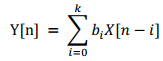

### **MSE formula:**


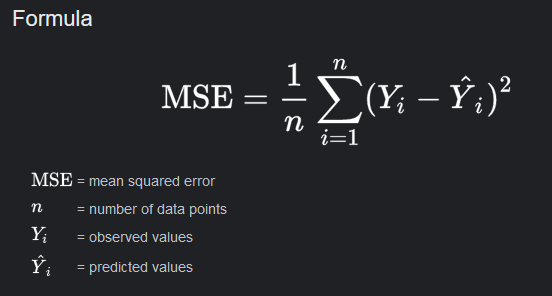

In [ ]:
# Create FIR Filter with LMS algorithm

coefs = [1.1, 0.51, 0.41, 1, 0.7]

complete = False

coefs1 = []

while not complete:
  output = []
  print(coefs)
  coefs1.append(coefs[0])

  for i in range(len(noisy_ecg)):
    # FIR filter Formula
    output.append(coefs[0]*noisy_ecg[i] + coefs[1]*noisy_ecg[i-1] + coefs[2]*noisy_ecg[i-2]
                  + coefs[3]*noisy_ecg[i-3]+ coefs[4]*noisy_ecg[i-4])

  output_f = abs(rfft(output))
  error_list = []
  mse = 0
  
  mse = np.square(np.subtract(output_f, ecg_rf)).mean()
  print(mse)
  if 0<mse<2.39:
    complete = True

  else:
    # print(len(coefs))
    e = []
    for n in range(len(ecg)):
      e.append(ecg[n] - output[n])

    for i in range(len(coefs)):
      for n in range(len(ecg)):
        mu = 0.001
        coefs[i] += 2 * mu * e[n] * noisy_ecg[n]

  

print(len(output))

[1.1, 0.51, 0.41, 1, 0.7]
2603.1732151323135
[0.09734446709214879, -0.49265553290785297, -0.592655532907852, -0.00265553290785051, -0.30265553290785135]
84.23269526266225
[0.9761937646488528, 0.38619376464885313, 0.28619376464885343, 0.8761937646488535, 0.5761937646488546]
1550.0180138017774
[0.20586331469271638, -0.38413668530728046, -0.48413668530728055, 0.1058633146927175, -0.19413668530728181]
53.69483710245328
[0.8810746436194845, 0.2910746436194901, 0.1910746436194899, 0.7810746436194862, 0.4810746436194888]
925.5675745773253
[0.2892372850715845, -0.30076271492841, -0.4007627149284104, 0.18923728507158857, -0.11076271492841015]
171.96242422630147
[0.8079955522495108, 0.21799555224951664, 0.1179955522495159, 0.7079955522495133, 0.407995552249517]
554.8004676842593
[0.35329269194728424, -0.23670730805271037, -0.336707308052711, 0.2532926919472878, -0.04670730805270946]
344.9922996728392
[0.751849600335047, 0.16184960033504964, 0.061849600335049104, 0.6518496003350494, 0.35184960033

In [ ]:
for i in coefs1:
  print(i)

1.1
0.09734446709214879
0.9761937646488528
0.20586331469271638
0.8810746436194845
0.2892372850715845
0.8079955522495108
0.35329269194728424
0.751849600335047
0.4025058352264887
0.7087132140269302
0.44031581239389933
0.675571949870288
0.46936484844692106
0.6501098404099631
0.49168293903643345
0.6305475504772285
0.5088297099878943
0.6155180342461145
0.5220034065853923
0.6039710037646067
0.5321246289738085
0.595099533060528
0.5399006652501606
0.5882836687931381
0.5458749179491549
0.5830471068677183
0.5504648779291539
0.5790239075017958
0.5539912993377241
0.5759329227357457
0.5567006144526833
0.5735581493390091
0.5587821547854058


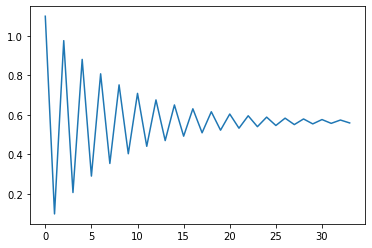

In [ ]:
plt.plot(coefs1)

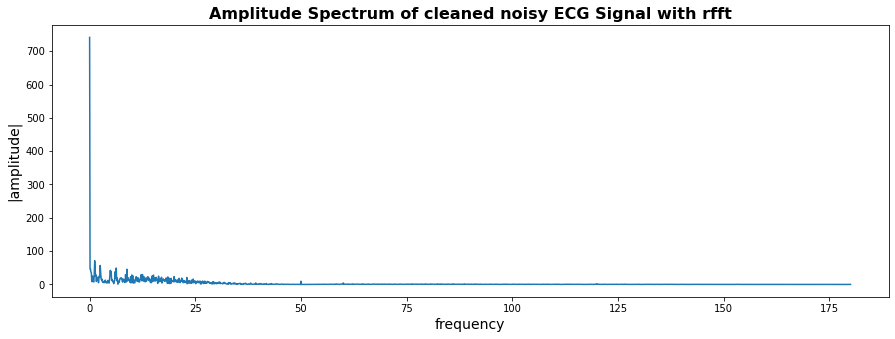

In [ ]:
# mse

# coefs
xf3 = rfftfreq(n=3600, d=1/360)
output_f = abs(rfft(output))
plt.figure(figsize=(15, 5))
plt.plot(xf3, output_f)
plt.title("Amplitude Spectrum of cleaned noisy ECG Signal with rfft", fontdict={"size":16, 'weight': 'bold'})
plt.xlabel('frequency', fontdict={"size":14})
plt.ylabel('|amplitude|', fontdict={"size":14})
plt.show()